> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project:Investigate a Dataset (No-show Appointment  )
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction




In [6]:
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#What factors are important  to know in order to predict if a patient will show up for their 
#scheduled appointment or no?
#This dataset collected from 100k medical appointments in Brazil
#and is focused on the question of whether or not patients show up for their appointment.

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

After Observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevent data and deleting the unused data.
### General Properties


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('appointment.csv')
transDF = pd.DataFrame()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.shape

(110527, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [6]:
#check for duplicate
df.duplicated().sum()

0

In [7]:
#check for null value
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#The maximum value of the Age_column is 115 quite high but realistic .
#The minumum value of the Age_column is -1 , it unacceptale will be inspected. print('maximum age:',df['Age'].max())
print('minimum age:',df['Age'].min())   

maximum age: 115
minimum age: -1


In [ ]:
General observations:
*The data set has 14 columns and 110527 rows .
*There are 13 independent variables and one dependent (no_show) in the dataset.
*The dataset does not contain any missing values ,since each column has 110527  values.
*The dataset does not contain any duplicates values.
Now,That we have finished the cleaning work , we can continues with explorative analysis .

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [ ]:
#drop null value 
df = df.drop(df[df["Age"]==-1].index)
df['Age'].min()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Is there a specific gender that is more committed to attending appointment?)

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.
#showed_up = df['no_show'] =='No'
#not_showed_up = df['no_show'] =='Yes'
#In the dataset description, it mention that in no_show column No means patient showed up
#and yes means patient did not showed up.                                

In [9]:
A1=df.groupby('Gender')['No-show'].value_counts().unstack()
A1

No-show,No,Yes
Gender,,
F,57246,14594
M,30962,7725


In [10]:
A1=df.groupby('Gender')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()
A1

No-show,No,Yes
Gender,,
F,79.69,20.31
M,80.03,19.97


In [ ]:
#Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.
#Out of 38685 appointments made by males, 7723 were missed with the ratio of 19%.

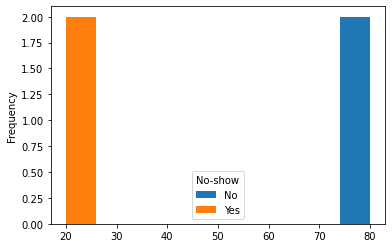

In [11]:
A1=df.groupby('Gender')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack().plot.hist()

In [ ]:
#As shown above, gender does not seem to affect whether a person shows up to an appointment or not, 
#as both males and females don't show up to approximately 20 percent of their appointments. 

In [14]:
### Research Question 2(Is there a difference the average age of patient who miss appointments and those who do not?)

In [18]:
Age_show=df.groupby('Age')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()
Age_show2=df.groupby('Age')['No-show'].value_counts().unstack()
Age_show2

No-show,No,Yes
Age,,
0,2900.0,639.0
1,1858.0,415.0
2,1366.0,252.0
3,1236.0,277.0
4,1017.0,282.0
...,...,...
98,5.0,1.0
99,1.0,NaN
100,4.0,NaN


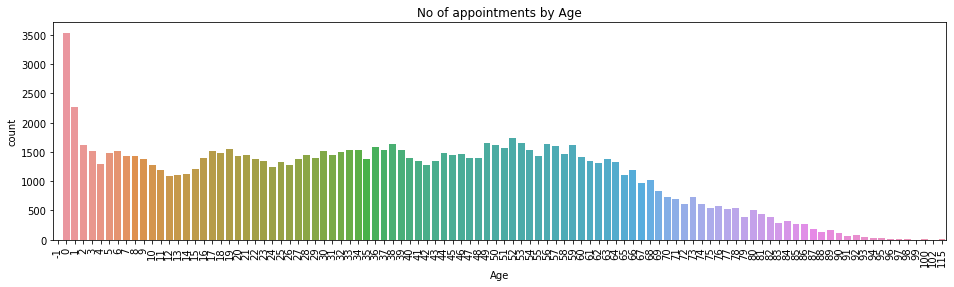

In [19]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of appointments by Age")
plt.show()

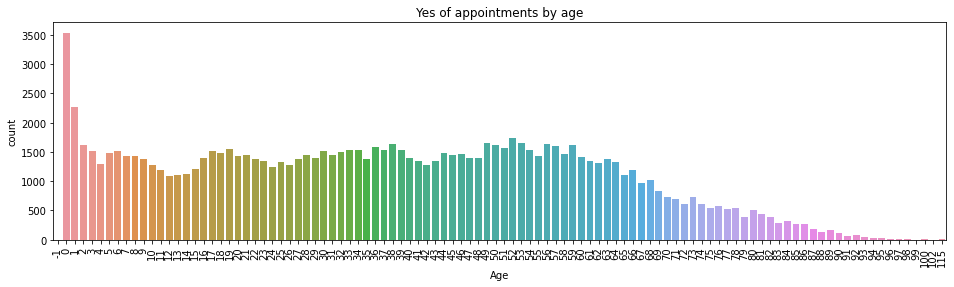

In [20]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Yes of appointments by age")
plt.show()

In [17]:
df.groupby('No-show')['Age'].mean()

No-show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

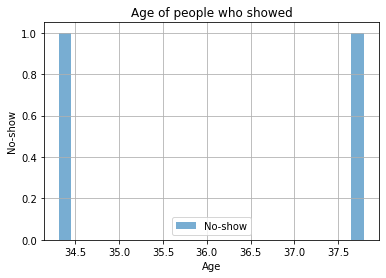

In [18]:
df.groupby('No-show')['Age'].mean().hist(alpha=0.6,bins=25,label='No-show');
plt.xlabel("Age")
plt.ylabel("No-show")
plt.title("Age of people who showed")
plt.legend()

In [ ]:
#age: The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
#There is a data range problem in the dataset. 

#age: There are many very young people in the dataset but in general the patients age is
#distributed evenly and the number of patients goes drastricly down for patients older than 60 years.

### Research Question 2  ( What factors are important to know in order to predict if a patient will show up for their scheduled appointment?



In [68]:
col_list=["Scholarship","Hipertension", "Diabetes", "Alcoholism", "Handcap"]
transDF=pd.DataFrame(df,columns=["Scholarship","No-show","Gender","Hipertension", "Diabetes", "Alcoholism", "Handcap"])
transDF["sum_desieas"] = transDF[col_list].sum(axis=1)
transDF

,Scholarship,No-show,Gender,Hipertension,Diabetes,Alcoholism,Handcap,sum_desieas
0,0,No,F,1,0,0,0,1
1,0,No,M,0,0,0,0,0
2,0,No,F,0,0,0,0,0
3,0,No,F,0,0,0,0,0
4,0,No,F,1,1,0,0,2
...,...,...,...,...,...,...,...,...
110522,0,No,F,0,0,0,0,0
110523,0,No,F,0,0,0,0,0
110524,0,No,F,0,0,0,0,0
110525,0,No,F,0,0,0,0,0


In [69]:
A=transDF.groupby(["Scholarship","No-show","Gender","Hipertension", "Diabetes", "Alcoholism", "Handcap","sum_desieas"]).size().reset_index(name='count_patient')
A

,Scholarship,No-show,Gender,Hipertension,Diabetes,Alcoholism,Handcap,sum_desieas,count_patient
0,0,No,F,0,0,0,0,0,37711
1,0,No,F,0,0,0,1,1,413
2,0,No,F,0,0,0,2,2,36
3,0,No,F,0,0,0,3,3,3
4,0,No,F,0,0,1,0,1,361
...,...,...,...,...,...,...,...,...,...
122,1,Yes,M,0,1,0,0,2,4
123,1,Yes,M,1,0,0,0,2,19
124,1,Yes,M,1,0,1,0,3,3
125,1,Yes,M,1,1,0,0,3,5


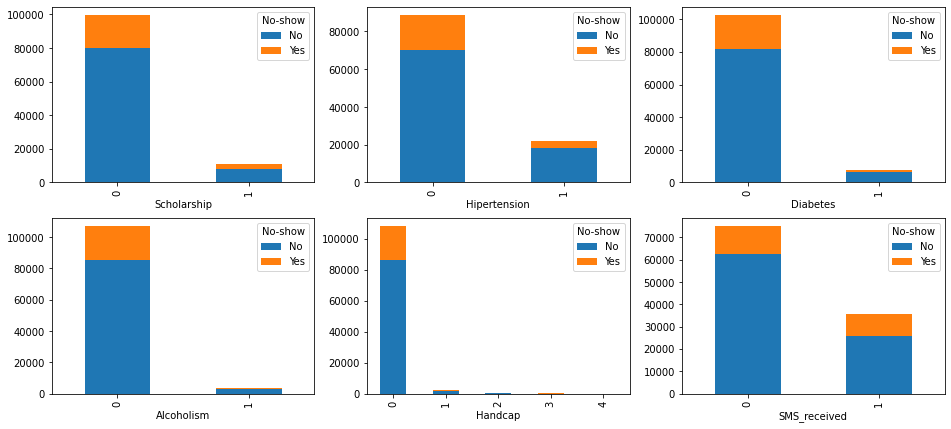

In [74]:
# First, let's look at categorical variables
col_list = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
fig = plt.figure(figsize=(16, 11))
for i, col in enumerate(col_list):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([col, 'No-show'])[col].count().unstack('No-show').plot(ax=ax, kind='bar', stacked=True)

In [30]:
A3=df.groupby('Scholarship')['No-show'].value_counts().unstack()
A3

No-show,No,Yes
Scholarship,,
0,79924,19741
1,8283,2578


In [38]:
A3=df.groupby('Scholarship')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()
A3

No-show,No,Yes
Scholarship,,
0,80.19,19.81
1,76.26,23.74


In [ ]:
#Percentage of Patients joined the  Scholarship = 9.826558216544374% 

#Patients Enrolled in Scholarship

Rercentage of Patients missed appointment = 23.73630420771568%
Percentage of Patients attended appointment = 76.26369579228432%

#Patients didnt Enrolled in Scholarship

Rercentage of Patients missed appointment = 19.807155900708366%
Percentage of Patients attended appointment = 80.19284409929163%

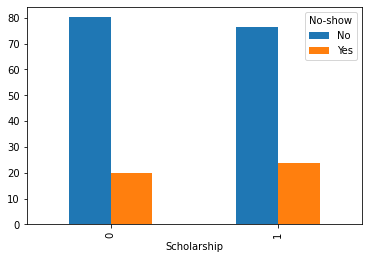

In [30]:
A3=df.groupby('Scholarship')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack().plot.bar()

In [ ]:
#Here we can observer that about 10% of all the patients are enrolled in the well fare Scholarship only hence it does not have a great role to play

#a slightly better attendance rate vs missing rate exist for the enrolled patients population as Scholarship to the general patients populations

#As cleare by the bar graph this attribute does not have a major impact on the general patients trends.

#The reason for the slight increase in the attendance / missing ratio for the people wha are enrolled can be due to wavers offered to them.

In [32]:
A2=df.groupby('Handcap')['No-show'].value_counts().unstack()
A2

No-show,No,Yes
Handcap,,
0,86373,21912
1,1676,366
2,146,37
3,10,3
4,2,1


In [ ]:
The value distribution implies differentiations of the handicap-degree. 
0 appears to be no handicap. The amounts of each degree are quite low, especially from degree 2 on. 

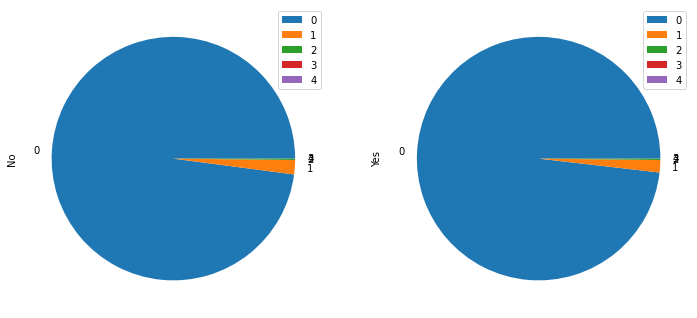

In [74]:
A2=df.groupby('Handcap')['No-show'].value_counts().unstack().plot.bar()

In [62]:
A4=df.groupby('Hipertension')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()
A4

No-show,No,Yes
Hipertension,,
0,79.1,20.9
1,82.7,17.3


array([<AxesSubplot:ylabel='No'>, <AxesSubplot:ylabel='Yes'>],
      dtype=object)

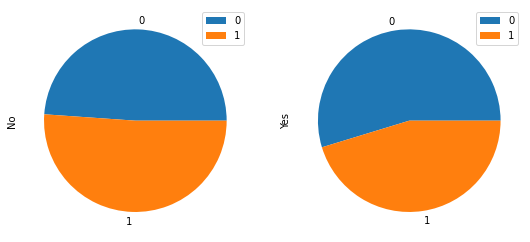

In [69]:
A4.plot.pie(subplots=True, figsize=(9, 6))

In [ ]:
#Here we notice that the patients suffer from hypertension they tend to attend appointment 82% times.
#Hence it is as expceted that the patients with a diseas tend to attend appointments more.

In [64]:
A5=df.groupby('Diabetes')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()
A5

No-show,No,Yes
Diabetes,,
0,79.64,20.36
1,82.00,18.00


array([<AxesSubplot:ylabel='No'>, <AxesSubplot:ylabel='Yes'>],
      dtype=object)

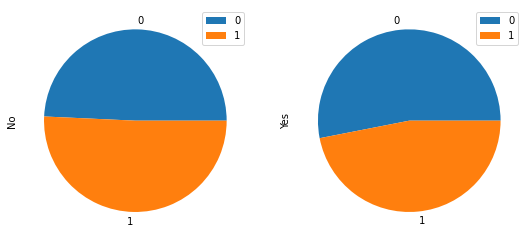

In [75]:
A5.plot.pie(subplots=True, figsize=(9, 6))

In [ ]:
#Here we notice that the patients suffer from Diabetes they tend to attend appointment 82% times
#Hence it is as expceted that the patients with a diseas tend to attend appointments more

In [65]:
A6=df.groupby('Alcoholism')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()
A6

No-show,No,Yes
Alcoholism,,
0,79.81,20.19
1,79.85,20.15


array([<AxesSubplot:ylabel='No'>, <AxesSubplot:ylabel='Yes'>],
      dtype=object)

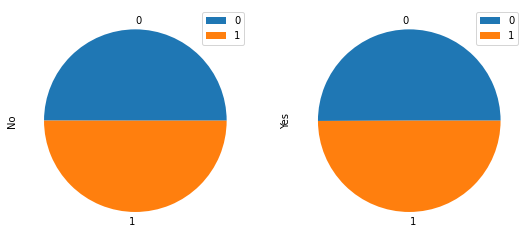

In [76]:
A6.plot.pie(subplots=True, figsize=(9, 6))

In [ ]:
Here we notice that the patients suffer from Alcoholism they tend to attend appointment 79.85% times.
Hence it is as expceted that the patients with a diseas tend to attend appointments more.

In [66]:
A7=df.groupby('SMS_received')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()
A7

No-show,No,Yes
SMS_received,,
0,83.30,16.70
1,72.43,27.57


array([<AxesSubplot:ylabel='No'>, <AxesSubplot:ylabel='Yes'>],
      dtype=object)

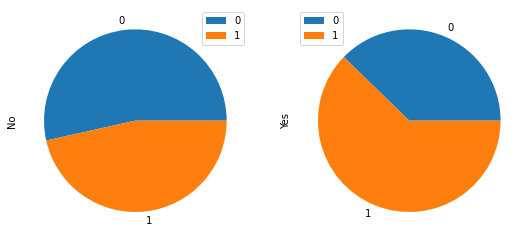

In [77]:
A7.plot.pie(subplots=True, figsize=(9, 6))

In [ ]:
#Here we notice that around 32% of patients recieve SMS and they tend to attend appointment 72% times
#while patents who dont get SMS tend to attend 83%of times


<a id='conclusions'></a>
## Conclusions
I have looked into the dataset and managed a few problems like  removing wrong data.
I have also investigated most of independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent one (no_show).
 As this was only an exploratory analysis, many potential correlations may remain uncovered. 
The data should be investigated further with more advanced statistical analysis to potentially reveal new insights and correlations.
The most important findings are:

*General trend is that around 80% patients attend appointment.

*A trend related to age could be observerd where people with lower age less than 35 tend to miss apointment more then the people with age greater than 35

*Medical Scholarship has very little imaact on the trend

*Diseased Patients tend to attend appointment approximately 84% times

*Sending SMS has a worse imapct on people as the general trends shows that people who get sms are less likely to attend appointment as compared to those who dosent

*The different categories (Columns) Provided in this data set do not provide sufficent information to derive the exact reason behind the behaviour of the patients towards attending or missing the appointment.

*We observe a anamolous behviour when we study the patients who recieve SMS miss their appointment often. Now we cannot get to the exact cause of this scenario due to limitation of the data set as it does not discss to whom the sms are sent like is it for older people, for premium clients , or for those who require special medical attention etc.

*The features such as different gender or diseased is not a factor to decide if the person would come to his appointment or not!